In [41]:
import xgboost
import numpy as np
import csv
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.utils import Bunch
from xgboost import XGBClassifier, plot_tree
import matplotlib.pyplot as plt

In [42]:
def load_blood_transfusion():
    data = []
    target = []
    with open('data_banknote_authentication.txt', newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        next(reader, None)
        for row in reader:
            values = [float(val) for val in row]
            data.append(values[:-1])
            target.append(values[-1])

    bunch = Bunch()
    bunch.data = data
    bunch.target = target
    return bunch



In [43]:

def calc_hyperparams(classifier, params, x, y):
    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.75, random_state=0)

    scoring = {'Accuracy': 'accuracy', 'Precision': 'precision', 'AUC': 'roc_auc', 'Recall': 'recall',
               'F1_score': 'f1_macro'}

    model = GridSearchCV(classifier, params, scoring=scoring, cv=2, refit='AUC')
    model.fit(train_x, train_y)

    print("Best parameters set found on development set:")
    print(model.best_params_)

    print('Accuracy: ', model.cv_results_['mean_test_Accuracy'][model.best_index_])
    print('Precision: ', model.cv_results_['mean_test_Precision'][model.best_index_])
    print('Recall: ', model.cv_results_['mean_test_Recall'][model.best_index_])
    print('AUC: ', model.cv_results_['mean_test_AUC'][model.best_index_])
    print('F1_score: ', model.cv_results_['mean_test_F1_score'][model.best_index_])

    return model.best_params_



In [44]:
dataset = load_blood_transfusion()
x = dataset.data
y = dataset.target
iterations = 500

In [45]:
classifier = XGBClassifier()
'''hyper_params = calc_hyperparams(classifier, {
    'n_estimators': [1, 2, 3, 9, 12, 15, 30, 50, 100, 150, 300, 500, 1000],
    'learning_rate': [0.00000000001, 0.0000000001, 0.000000001, 0.00000001, 0.0000001, 0.000001],
    'max_depth': [3, 5, 6, 9, 12, 15, 30]
}, np.matrix(x), np.array(y))'''
hyper_params = calc_hyperparams(classifier, {
    'n_estimators': [9],
    'learning_rate': [0.0000001],
    'max_depth': [9]
}, np.matrix(x), np.array(y))

model = XGBClassifier(**hyper_params)
model.fit(np.matrix(x), np.array(y))

with open("model.json", "w") as f:
    f.write(model._Booster.get_dump(dump_format='json')[0])
plot_tree(model,rankdir='LR')

Best parameters set found on development set:
{'learning_rate': 1e-07, 'max_depth': 9, 'n_estimators': 9}
Accuracy:  0.923976608187
Precision:  0.925880361378
Recall:  0.914099712797
AUC:  0.922015820847
F1_score:  0.923691416228


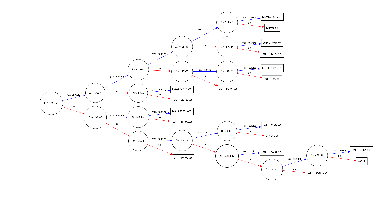

In [46]:
plt.figure(figsize=(10,20))
plt.show()